# Bernoulli Differential Equations: Mixed Drag Model

A body of mass $m$ moves with velocity $v(t)$ subject to a retarding force that has both a linear component (laminar flow) and a quadratic component (turbulent flow). The equation of motion is given by:
$$ m \dot{v} = -c_1 v - c_2 v^2 $$

This is a Bernoulli equation of the form $\dot{v} + P(t)v = Q(t)v^n$ with $n=2$.

**Task:**
1. Rewrite this equation in the standard Bernoulli form.
2. Solve the ODE for $v(t)$ symbolically using `sympy`.
3. Visualize the solution for different drag coefficients to observe the transition between linear and quadratic drag dominance.

## Algebraic Solution:

$$  m \dot{v} = -c_1 v - c_2 v^2 $$


$$ \dot{v} + \frac{c_1}{m} v = -\frac{c_2}{m} v^2 $$
$$ \dot{v} + P(t)v = Q(t)v^n $$
$$ P(t) = \frac{c_1}{m}, \quad Q(t) = -\frac{c_2}{m}, \quad n = 2 $$

Substitution:
$$ v = f(t) \cdot g(t) $$
$$ \dot{v} = \dot{f} g + f \dot{g} $$
$$ \dot{f} g + f \dot{g} + \frac{c_1}{m} f g = -\frac{c_2}{m} f^2 g^2 $$

Rearranging:
$$ \dot{f} g + f (\dot{g} + \frac{c_1}{m} g) = -\frac{c_2}{m} f^2 g^2 $$
$$ \dot{g} + \frac{c_1}{m} g = 0 $$

Solving for $g(t)$:
$$ \frac{dg}{g} = -\frac{c_1}{m} dt $$
$$ \int \frac{dg}{g} = -\int \frac{c_1}{m} dt $$
$$ \ln|g| = -\frac{c_1}{m} t + C' $$
$$ g(t) = C e^{-\frac{c_1}{m} t} $$

Substituting back:
$$ \dot{f} g = -\frac{c_2}{m} f^2 g^2 $$
$$ \dot{f} = -\frac{c_2}{m} f^2 g $$
$$ \dot{f} = -\frac{c_2}{m} f^2 C e^{-\frac{c_1}{m} t} $$

Solving for $f(t)$:
$$ \frac{df}{f^2} = -\frac{c_2 C}{m} e^{-\frac{c_1}{m} t} dt $$
$$ \int \frac{df}{f^2} = -\frac{c_2 C}{m} \int e^{-\frac{c_1}{m} t} dt $$
$$ -\frac{1}{f} = -\frac{c_2 C}{m} \left( -\frac{m}{c_1} e^{-\frac{c_1}{m} t} \right) + D $$
$$ -\frac{1}{f} = \frac{c_2 C}{c_1} e^{-\frac{c_1}{m} t} + D $$
$$ f(t) = -\frac{1}{\frac{c_2 C}{c_1} e^{-\frac{c_1}{m} t} + D} $$

Solution for $v(t)$:
$$ v(t) = f(t) g(t) = -\frac{1}{\frac{c_2 C}{c_1} e^{-\frac{c_1}{m} t} + D} \cdot C e^{-\frac{c_1}{m} t} $$
$$ v(t) = -\frac{C e^{-\frac{c_1}{m} t}}{\frac{c_2 C}{c_1} e^{-\frac{c_1}{m} t} + D} $$
$$ v(t) = \frac{1}{\frac{\frac{c_2 C}{c_1} e^{-\frac{c_1}{m} t} + D}{-C e^{-\frac{c_1}{m} t}}} $$
$$ v(t) = \frac{1}{-\frac{c_2}{c_1} - \frac{D}{C} e^{\frac{c_1}{m} t}} $$
$$ v(t) = \frac{1}{K e^{\frac{c_1}{m} t} - \frac{c_2}{c_1}} $$







In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
from numpy.typing import ArrayLike, NDArray

# Define symbols
t = sp.symbols("t")
v = sp.Function("v")(t)
m, c1, c2 = sp.symbols("m c_1 c_2", real=True, positive=True)

# Define the ODE
#  m \dot{v} = -c_1 v - c_2 v^2
ode = sp.Eq(m * v.diff(t), -c1 * v - c2 * v**2)
display(ode)

Eq(m*Derivative(v(t), t), -c_1*v(t) - c_2*v(t)**2)

In [45]:
t0 = 0.0
v0 = 100.0

# ode = ode.subs({m: m_value, c1: c1_value, c2: c2_value})

## General solution

In [46]:
sol = sp.dsolve(ode, v)
sol = sp.simplify(sol)
display(sol)

Eq(v(t), -c_1*exp(C1*c_1)/(c_2*(exp(C1*c_1) - exp(c_1*t/m))))

## Particular solution with initial conditions

In [47]:
initial_conditions = {v.subs(t, t0): v0}
particular_sol = sp.dsolve(ode, v, ics=initial_conditions)
particular_sol = sp.simplify(particular_sol)
display(particular_sol)

Eq(v(t), -100.0*c_1/(100.0*c_2 - 1.0*(c_1 + 100.0*c_2)*exp(c_1*t/m)))

## Drag coefficients and visualization

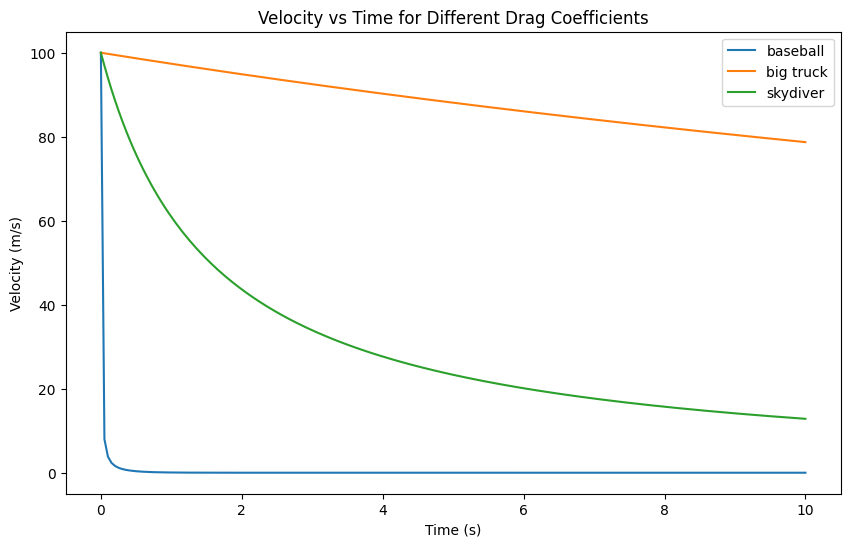

In [48]:
from copy import copy

# m, c1, c2
cases = {
    "baseball": (0.145, 0.5, 0.3),
    "big truck": (3000.0, 1.0, 0.8),
    "skydiver": (80.0, 1.0, 0.5),
}
t_span = (0, 10)
t_eval = np.linspace(*t_span, 200)
plt.figure(figsize=(10, 6))
for label, (m_val, c1_val, c2_val) in cases.items():
    particular_sol_subs = copy(particular_sol).rhs.subs(
        {m: m_val, c1: c1_val, c2: c2_val}
    )
    v_func = sp.lambdify(t, particular_sol_subs, "numpy")
    v_values = v_func(t_eval)

    plt.plot(t_eval, v_values, label=label)

plt.title("Velocity vs Time for Different Drag Coefficients")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()


In [49]:
def ode_func(t, v):
    return (-c1_val * v - c2_val * v**2) / m_val

Eq(v(t), -100.0/(50.0 - 51.0*exp(0.0125*t)))

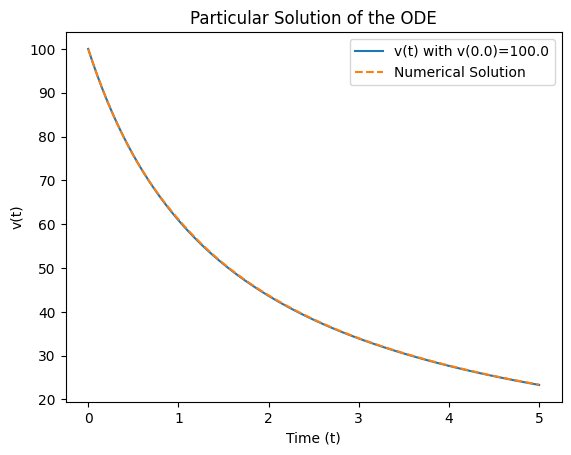

In [50]:
# skydiver values
m_val, c1_val, c2_val = cases["skydiver"]
particular_sol = particular_sol.subs({m: m_val, c1: c1_val, c2: c2_val})

display(particular_sol)

t_values = np.linspace(0, 5, 100)
v_func = sp.lambdify(t, particular_sol.rhs, "numpy")
v_values = v_func(t_values)
plt.plot(t_values, v_values, label=f"v(t) with v({t0})={v0}")

# numerical solution for comparison
sol = solve_ivp(ode_func, t_span, [v0], t_eval=t_values)
plt.plot(sol.t, sol.y[0], label="Numerical Solution", linestyle="dashed")

plt.title("Particular Solution of the ODE")
plt.xlabel("Time (t)")
plt.ylabel("v(t)")
plt.legend()
plt.show()

## Phase space analysis

In [ ]:
m_val, c1_val, c2_val = cases["skydiver"]


def system(
    t: ArrayLike,
    v: ArrayLike,
) -> tuple[NDArray, NDArray]:
    dt = np.ones_like(t)  # Time derivative of t is 1
    dv = (-c1_val * v - c2_val * v**2) / m_val  # Time derivative of v from the ODE
    return dt, dv

In [55]:
print(f"C1/c2 = {c1_val / c2_val}")

C1/c2 = 2.0


C:\Users\janvy\AppData\Local\Temp\ipykernel_31324\3797950953.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


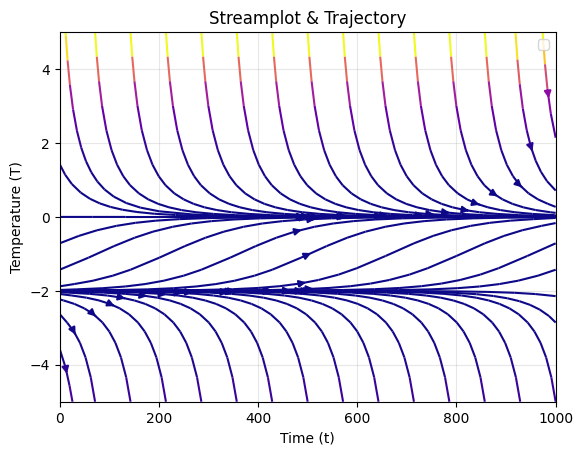

In [64]:
plt.figure()

t_grid = np.linspace(0, 1000, 1000)
v_grid = np.linspace(-5, 5, 1000)
t_mesh, v_mesh = np.meshgrid(t_grid, v_grid)
dt_mesh, dv_mesh = system(t_mesh, v_mesh)

plt.streamplot(
    t_mesh,
    v_mesh,
    dt_mesh,
    dv_mesh,
    density=0.5,
    color=np.hypot(dt_mesh, dv_mesh),
    cmap="plasma",
    linewidth=1.5,
    broken_streamlines=False,
)

plt.title("Streamplot & Trajectory")
plt.xlabel("Time (t)")
plt.ylabel("Temperature (T)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Stability analysis

$$ \dot{v} = -\frac{c_1}{m} v - \frac{c_2}{m} v^2 $$
$$ \dot{v} = v \left( -\frac{c_1}{m} - \frac{c_2}{m} v \right) $$
$$ v = 0 \quad \text{or} \quad v = -\frac{c_1}{c_2} $$

The equilibrium points are:
1. $v = 0$: This is an equilibrium point where the velocity is zero. The stability of this point depends on the signs of $c_1$ and $c_2$. If $c_1 > 0$ and $c_2 > 0$, this point is stable, as any small perturbation will lead to a negative $\dot{v}$, bringing the system back to equilibrium.
2. $v = -\frac{c_1}{c_2}$: This is another equilibrium point where the velocity is constant. The stability of this point also depends on the signs of $c_1$ and $c_2$. If $c_1 > 0$ and $c_2 > 0$, this point is unstable, as any small perturbation will lead to a positive $\dot{v}$, causing the system to move away from equilibrium.